# microsoft-stock-price-prediction

Use the "Run" button to execute the code.

In [30]:
pip install numpy pandas matplotlib seaborn plotly sklearn opendatasets xgboost --quiet

In [31]:
# Import some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-27,214.850006,216.270004,214.039993,215.229996,211.459473,14512200
1,2020-11-30,214.100006,214.759995,210.839996,214.070007,210.319809,33064800
2,2020-12-01,214.509995,217.320007,213.350006,216.210007,212.422318,30904500
3,2020-12-02,214.880005,215.470001,212.800003,215.369995,211.597000,23724500
4,2020-12-03,214.610001,216.380005,213.649994,214.240005,210.486816,25120900
...,...,...,...,...,...,...,...
498,2022-11-18,243.509995,243.740005,239.029999,241.220001,241.220001,27591800
499,2022-11-21,241.429993,244.669998,241.190002,242.050003,242.050003,26394700
500,2022-11-22,243.589996,245.309998,240.710007,245.029999,245.029999,19665700
501,2022-11-23,245.110001,248.279999,244.270004,247.580002,247.580002,19508500


In [33]:
df['Daily_return'] = df['Adj Close'].pct_change()

Let's look at the daily changes of the stock as percentage using line plot and histogram.

<Figure size 432x288 with 0 Axes>

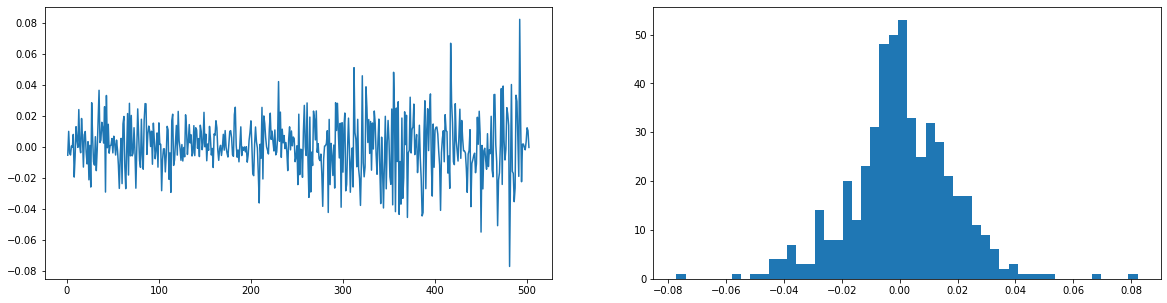

In [56]:
plt.figure()
plt.figure(figsize=[20,5])
plt.subplot(121)
plt.plot(df['Daily_return']);

plt.subplot(122)
plt.hist(df['Daily_return'],bins=50);

In [57]:
df = df[['Date','Close']]
df

,Date,Close
0,2020-11-27,215.229996
1,2020-11-30,214.070007
2,2020-12-01,216.210007
3,2020-12-02,215.369995
4,2020-12-03,214.240005
...,...,...
498,2022-11-18,241.220001
499,2022-11-21,242.050003
500,2022-11-22,245.029999
501,2022-11-23,247.580002


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    503 non-null    object 
 1   Close   503 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [ ]:
# First change the datatype of column 'Date' from 'object' to 'datetime64[ns]'
import datetime

def to_datetime(s):
    date = s.split('-')
    return datetime.datetime(year=int(date[0]),month=int(date[1]),day=int(date[2]))

In [ ]:
df['Date'] = df['Date'].apply(to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    503 non-null    datetime64[ns]
 1   Close   503 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


In [ ]:
df1 = df.Close
df1

0      215.229996
1      214.070007
2      216.210007
3      215.369995
4      214.240005
          ...    
498    241.220001
499    242.050003
500    245.029999
501    247.580002
502    247.490005
Name: Close, Length: 503, dtype: float64

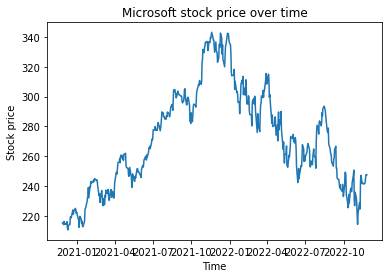

In [ ]:
plt.title('Microsoft stock price over time')
plt.plot(df.Date, df.Close)
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.show()

In [ ]:
# Split dataset into training and test dataset
train_size = int(len(df1)*0.7)
test_size = len(df1) - train_size

In [ ]:
train_size,test_size,len(df1)

(352, 151, 503)

In [ ]:
train,test = df1[0:train_size],df1[train_size:len(df1)]

In [ ]:
# Feature engineering
# Scale the date
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(np.array(train).reshape(-1,1))
test = scaler.transform(np.array(test).reshape(-1,1))

In [ ]:
def create_database(data,test_size=1):
    X,Y = [],[]
    for i in range(len(data)-test_size-1):
        f = data[i:(i+test_size),0]
        X.append(f)
        Y.append(data[i+test_size,0])
    return np.array(X),np.array(Y)

In [ ]:
test_size = 10
X_train,y_train = create_database(train,test_size)
X_test,y_test = create_database(test,test_size)

In [ ]:
print(X_train.shape,X_test.shape)

(341, 10) (140, 10)


In [ ]:
# Reshape the input to be [samples, time steps, features] which is required in LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.9 kB/s 
     |████████████████████████████████| 1.7 MB 49.1 MB/s 
     |████████████████████████████████| 6.0 MB 30.0 MB/s 
     |████████████████████████████████| 439 kB 65.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 3/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 4/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 6/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 7/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 8/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 9/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 10/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 11/100
6/6 [=

In [ ]:
# Predict train and test dataset
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [ ]:
# Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train,train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
print('Train RMSE = ',train_rmse)
print('Test RMSE  = ',test_rmse)

Train RMSE =  283.1180300786145
Test RMSE  =  258.62010202253316


In [ ]:
train_predict = train_predict.flatten()
test_predict = test_predict.flatten()

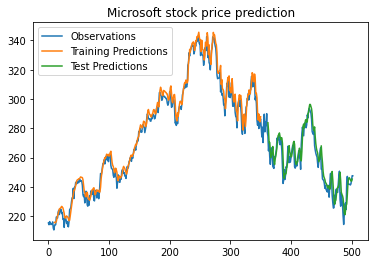

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict
# plot baseline and predictions
plt.title('Microsoft stock price prediction')
plt.plot(df1)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Observations','Training Predictions', 'Test Predictions'])
plt.show()

# Conclusion
1.  We downloaded the stock market data of MSFT from the YAHOO Finance website using yfinance.
2.  We explored and visualized time-series data using Pandas and Matplotlib.
3. We predicted the MSFT stock price using LSTM and training and test RMSE came out to be 283.11 and 258.62 respectively.